In [1]:
# plot settings
options(repr.plot.width=5, repr.plot.height=4)
library("mclust")
library("ggplot2")
library(class)

Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.



# Problem Set 8: k-Nearest-Neighbors and the variance-bias tradeoff

In polynomial regression, we use data to learn a model $y(x)$, (specifically, we learn the coefficients $\beta$) so that we may predict what $y_i$ is generated by an $x_i$. 

One challenge is choosing the proper order of polynomial. Too low-order, and you will bias the model towards a simple explanation. Too high-order, and your model will vary for slightly different input data. 

In this problem set, we observe the same variance-bias tradeoff in a different method of learning a predictive model.

## k-Nearest-Neighbors

Neutrophils are white blood cells that activate to fight infection. Active neutrophils have slightly different size and deformability compared to inactive neutrophils.  

Suppose you have build a high-throughput cell measurement tool that detects the size $x_1$ and deformability $x_2$ of cells. Suppose you have $N$ observations of $y, x_1, x_2$ where $y=1$ for active and $y=0$ for inactive cells. 

In the k-Nearest-Neighbors method, a new point $(x^n_1,x^n_2)$ has a probabilty of having $y^n=1$ given by
$$P(y^n=1) = \frac{1}{k} \sum_{i\in k \mbox{nearest}} I(y^i=1)$$
where $k \mbox{nearest}$ are the k nearest neighbors and $I(y^i=1)=1$ is the indicator function that $y^i==1$. 



In [2]:
# Generate simulated data

# This simulation code will make a sample of size 4.25*NPerQuadrant. 
# So, if NPerQuadrant=100, then the sample size is 425. 

NPerQuadrant <- 100

x_1_mean1 <- +0.6
x_1_mean2 <- -0.6
x_1_mean3 <- +0.6
x_1_mean4 <- -0.4
x_1_mean5 <- +0.4
x_2_mean1 <- +0.6
x_2_mean2 <- +0.6
x_2_mean3 <- -0.5
x_2_mean4 <- -0.6
x_2_mean5 <- +0.9
x_1_m <- c(x_1_mean1,x_1_mean2,x_1_mean3,x_1_mean4,x_1_mean5)
x_2_m <- c(x_2_mean1,x_2_mean2,x_2_mean3,x_2_mean4,x_2_mean5)
x_1_std1 <- 0.5
x_1_std2 <- 0.4
x_1_std3 <- 0.5
x_1_std4 <- 0.5
x_1_std5 <- 0.1

x_2_std1 <- 0.6
x_2_std2 <- 0.3
x_2_std3 <- 0.4
x_2_std4 <- 0.4
x_2_std5 <- 0.2
x_1_std <- c(x_1_std1,x_1_std2,x_1_std3,x_1_std4,x_1_std5)
x_2_std <- c(x_2_std1,x_2_std2,x_2_std3,x_2_std4,x_2_std5)

,Activated,Size,Deformability
,<fct>,<dbl>,<dbl>
253,1,0.63548276,-0.03479925
133,1,0.02881929,0.58971083
150,1,-0.52681264,0.56554177
354,0,-0.85340336,-0.21422209
202,1,1.19359504,-0.05954704
324,0,-1.24065034,-1.40445154


[1] 425   3

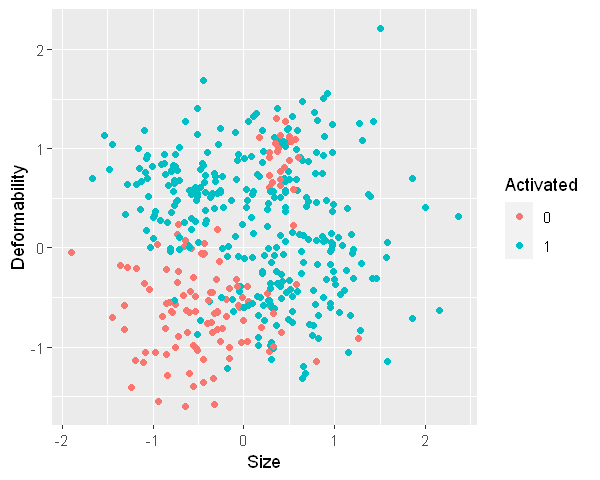

In [3]:
sizes1 = rnorm(NPerQuadrant,x_1_mean1,x_1_std1)
sizes2 = rnorm(NPerQuadrant,x_1_mean2,x_1_std2)
sizes3 = rnorm(NPerQuadrant,x_1_mean3,x_1_std3)
sizes4 = rnorm(NPerQuadrant,x_1_mean4,x_1_std4)
sizes5 = rnorm(NPerQuadrant/4,x_1_mean5,x_1_std5)

deformabilities1 = rnorm(NPerQuadrant,x_2_mean1,x_2_std1)
deformabilities2 = rnorm(NPerQuadrant,x_2_mean2,x_2_std2)
deformabilities3 = rnorm(NPerQuadrant,x_2_mean3,x_2_std3)
deformabilities4 = rnorm(NPerQuadrant,x_2_mean4,x_2_std4)
deformabilities5 = rnorm(NPerQuadrant/4,x_2_mean5,x_2_std5)

sizes = c(sizes1,sizes2, sizes3,sizes4,sizes5)
deformabilities = c(deformabilities1,deformabilities2, deformabilities3,deformabilities4,deformabilities5)

activated = c(rep(1,NPerQuadrant), rep(1,NPerQuadrant), rep(1,NPerQuadrant), rep(0,NPerQuadrant), rep(0,NPerQuadrant/4))
# TO GENERATE TRUE VALUES: CREATE GAUSSIAN MIXTURE MODEL WHERE FIRST 3 OF THESE ENTRIES IMPLIES ACTIVATION, OTHERWISE NO ACTIVATION
df <- data.frame("Activated" = as.factor(activated), "Size" = sizes, "Deformability" = deformabilities)

# shuffle
df <- df[sample(nrow(df)),]

head(df)
dim(df)
ggplot(df, aes(x=Size, y=Deformability, color=Activated)) + geom_point()

In [23]:
testValues = cbind(runif(2000,-2,2),runif(2000,-2,2))

train.df <- df[,c("Size","Deformability")]
train.factor <- df$Activated
length(train.factor)
knn.predValues = knn(train.df, testValues, train.factor, k=28)
length(knn.predValues)

[1] 425

[1] 2000

In [24]:
# create clustering function to generate "true" values for comparison to predictions
ev <- MclustDA(train.df, df$Activated)
#mclust1Dplot(ev, what="classification", classification=df$Activated)

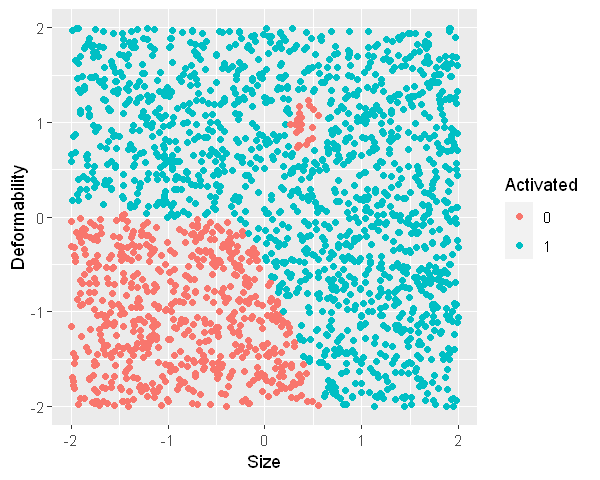

In [14]:
prd <- predict(ev,testValues)
true.df <- data.frame("Size"=testValues[,1],"Deformability"=testValues[,2],"Activated"=prd$classification,"ActivatedPred"=knn.predValues)
ggplot(true.df, aes(x=Size, y=Deformability, color=Activated)) + geom_point()

,Activated,Size,Deformability
,<fct>,<dbl>,<dbl>
1,1,-0.008189227,1.0294145
2,1,0.288675707,-0.6934132
3,0,-0.235695402,-1.7288778
4,0,-1.360265410,-0.5992412
5,0,-1.318372256,-0.2686201
6,1,0.202578159,1.6605413


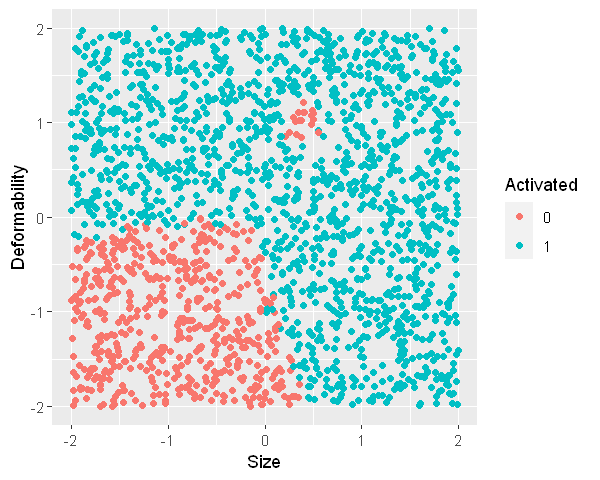

In [25]:
# plot the test results
dfTest = data.frame("Activated" = knn.predValues, "Size" = testValues[,1], "Deformability" = testValues[,2])
head(dfTest)
ggplot(dfTest, aes(x=Size, y=Deformability, color=Activated)) + geom_point()

## Variance-bias tradeoff in kNN

This method has several advantages over, e.g., logistic regression. For example, it can more easily handle curved boundaries between the two cell types.

However, the same challenge as with polynomial regression remains: How do you choose $k$? If you choose $k$ too small, you will have a very rough boundary, and the predictions will vary if you had a slightly different sample. If you choose $k$ too large, you will bias your predictions to a smoother boundary, missing details.

For one simulated data set of size 425 (as it is currently set to do), test the kNN classifier on a uniform sample in $x_1 \in (-2.0,2.0)$ and $x_2 \in (-2.0,2.0)$ (as in the above code blocks). 

Compute the fraction of correct predictions. This will be our Goodness of Fit measure

In [8]:
true.df$flag <- true.df$Activated == true.df$ActivatedPred
p.correct <- sum(true.df$flag)/length(true.df$flag)
p.correct

[1] 0.9405

Still for a fixed $k$, compute the average goodness of fit for 100 repeated simulated samples, each of size 425. (Note we could not do this in real life.)

In [9]:
repl.k.N <- function(K, N){
    p.correct.vec <- rep(1,N)
    looper <- 1:N
    for (i in looper) {
        sizes1 = rnorm(NPerQuadrant,x_1_m[1],x_1_std[1])
        sizes2 = rnorm(NPerQuadrant,x_1_m[2],x_1_std[2])
        sizes3 = rnorm(NPerQuadrant,x_1_m[3],x_1_std[3])
        sizes4 = rnorm(NPerQuadrant,x_1_m[4],x_1_std[4])
        sizes5 = rnorm(NPerQuadrant/4,x_1_m[5],x_1_std[5])

        deformabilities1 = rnorm(NPerQuadrant,x_2_m[1],x_2_std[1])
        deformabilities2 = rnorm(NPerQuadrant,x_2_m[2],x_2_std[2])
        deformabilities3 = rnorm(NPerQuadrant,x_2_m[3],x_2_std[3])
        deformabilities4 = rnorm(NPerQuadrant,x_2_m[4],x_2_std[4])
        deformabilities5 = rnorm(NPerQuadrant/4,x_2_m[5],x_2_std[5])

        sizes = c(sizes1,sizes2, sizes3,sizes4,sizes5)
        deformabilities = c(deformabilities1,deformabilities2, deformabilities3,deformabilities4,deformabilities5)

        activated = c(rep(1,NPerQuadrant), rep(1,NPerQuadrant), rep(1,NPerQuadrant), rep(0,NPerQuadrant), rep(0,NPerQuadrant/4))
        # TO GENERATE TRUE VALUES: CREATE GAUSSIAN MIXTURE MODEL WHERE FIRST 3 OF THESE ENTRIES IMPLIES ACTIVATION, OTHERWISE NO ACTIVATION
        df <- data.frame("Activated" = as.factor(activated), "Size" = sizes, "Deformability" = deformabilities)

        # shuffle
        df <- df[sample(nrow(df)),]

        train.df <- df[,c("Size","Deformability")]
        train.factor <- df$Activated
        knn.predValues = knn(train.df, testValues, train.factor, k=K)
        
        # Let the test set be fixed while training set varies.
        
        ev <- MclustDA(train.df, df$Activated)
        prd <- predict(ev,testValues)
        true.df <- data.frame("Size"=testValues[,1],"Deformability"=testValues[,2],"Activated"=prd$classification,"ActivatedPred"=knn.predValues)
        true.df$flag <- true.df$Activated == true.df$ActivatedPred
        p.correct.vec[i] <- sum(true.df$flag)/length(true.df$flag)
    }
    p.correct.vec
}

In [45]:
p.correct.3.10 <- repl.k.N(3, 100)
mean(p.correct.3.10)

[1] 0.94066

In [47]:
summary(p.correct.3.10)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8945  0.9309  0.9423  0.9407  0.9515  0.9725 

Compute the average goodness-of-fit over 100 repeated samples, each of size 425, sweeping over $k=1$ to $k=200$. 

What $k$ value optimizes the goodness-of-fit?

In [55]:
k.vec <- as.integer(seq(1,200,by=6))
typeof(k.vec)
k.vec[1]

[1] "integer"

[1] 1

In [56]:
k.vec <- as.integer(seq(1,200,by=6))
p.correct.m.k.vec <- 1:length(k.vec)
k.vec.looper <- 1:length(k.vec)
N.replicates <- 100
for (i in k.vec.looper) {
    p.correct.m.k.vec[i] <- mean(repl.k.N(k.vec[i], N.replicates))
}

In [77]:
# results computed in cell above were done with a fixed test set

k.vec[which.max(p.correct.m.k.vec)]
p.correct.m.k.vec
k.vec

[1] 31

[1] 0.920475 0.956155 0.961280 0.961565 0.963300 0.963915 0.961485 0.962805
 [9] 0.961115 0.958065 0.957795 0.958080 0.953450 0.953780 0.951215 0.951940
[17] 0.948425 0.944725 0.940350 0.939255 0.934625 0.933000 0.928870 0.925165
[25] 0.915840 0.915185 0.911885 0.902660 0.895320 0.878440 0.863990 0.836980
[33] 0.780665 0.732940

[1]   1   7  13  19  25  31  37  43  49  55  61  67  73  79  85  91  97 103 109
[20] 115 121 127 133 139 145 151 157 163 169 175 181 187 193 199

In [80]:
p.correct.m.k.df <- data.frame("k"=as.double(k.vec),"p.correct.mean"=as.double(p.correct.m.k.vec))

In [81]:
head(p.correct.m.k.df)

,k,p.correct.mean
,<dbl>,<dbl>
1,1,0.920475
2,7,0.956155
3,13,0.961280
4,19,0.961565
5,25,0.963300
6,31,0.963915


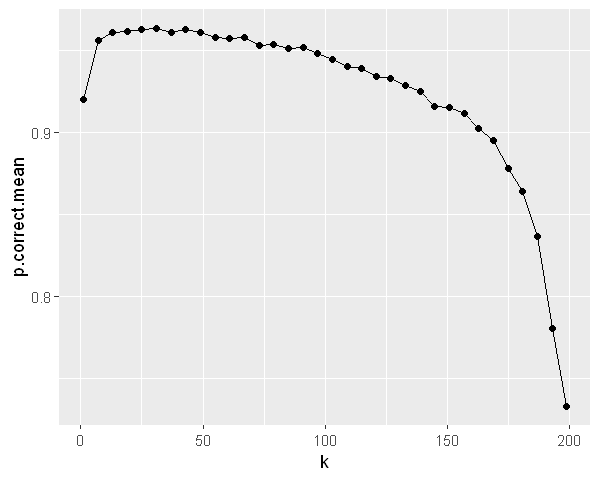

In [82]:
ggplot(p.correct.m.k.df,aes(x=k,y=p.correct.mean))+geom_point()+geom_line()

In [10]:
k.vec <- as.integer(seq(1,31,by=3))
p.correct.m.k.vec <- 1:length(k.vec)
k.vec.looper <- 1:length(k.vec)
N.replicates <- 100
for (i in k.vec.looper) {
    p.correct.m.k.vec[i] <- mean(repl.k.N(k.vec[i], N.replicates))
}

,Activated,Size,Deformability
,<fct>,<dbl>,<dbl>
1,1,1.9665000,-1.7806058
2,1,1.2126784,-1.1739571
3,1,-1.2477904,0.5964271
4,1,0.7588239,-1.4898058
5,1,-1.5096893,1.4681365
6,1,-0.6247580,0.6504976


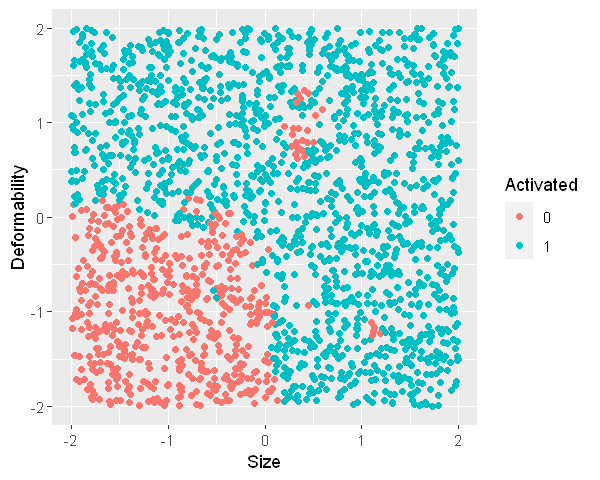

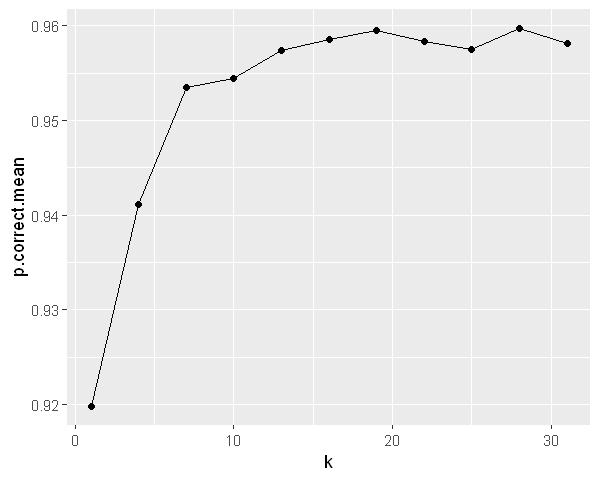

In [11]:
p.correct.m.k.df <- data.frame("k"=as.double(k.vec),"p.correct.mean"=as.double(p.correct.m.k.vec))

dfTest = data.frame("Activated" = knn.predValues, "Size" = testValues[,1], "Deformability" = testValues[,2])
head(dfTest)
ggplot(dfTest, aes(x=Size, y=Deformability, color=Activated)) + geom_point()
ggplot(p.correct.m.k.df,aes(x=k,y=p.correct.mean))+geom_point()+geom_line()

In [22]:
k.vec[which.max(p.correct.m.k.vec)]

[1] 28